<a href="https://colab.research.google.com/github/diaputr/machine-learning/blob/main/Modul_9_Perceptron_dan_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1: Klasifikasi Iris dengan Perceptron

## Langkah 1 - Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/ML/Ming9'

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Data dan Visualisasi

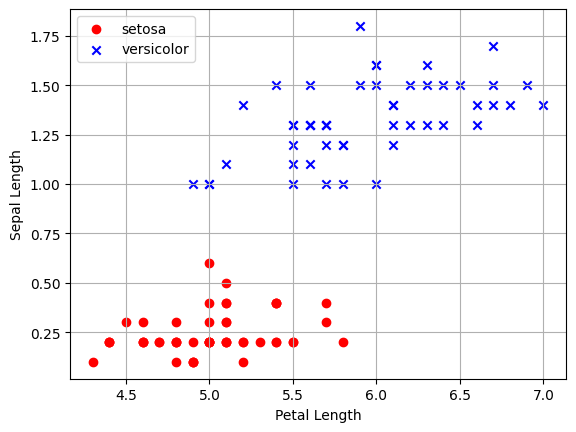

In [ ]:
df = pd.read_csv(f'{path}/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Langkah 4 - Pilih Data dan Encoding Label

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

## Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Langkah 6 - Visualisasi Nilai Error Per Epoch

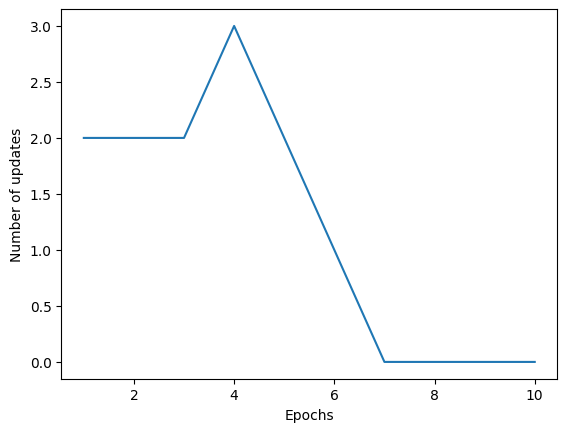

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Langkah 7 - Visualiasasi Decision Boundary

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Praktikum 2: Klasifikasi Berita dengan Perceptron

## Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

## Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

## Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Praktikum 3: Nilai Logika XOR dengan MLP

## Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

## Langkah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

## Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4: Klasifikasi dengan ANN

## Langkah 1 - Import Library

In [ ]:
import tensorflow as tf

## Langkah 2 - Load Data

In [ ]:
dataset = pd.read_csv(f'{path}/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## Langkah 3 - Encoding Data Kategorial

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


## Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Langkah 6 - Scalling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat Model ANN

## Langkah 1 - Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

## Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training Model

## Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5890 - accuracy: 0.7575
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7962
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7983
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8015
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8067
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8145
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8199
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8279
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8344
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3852 - accura

## Langkah 3 - Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 112ms/step
[[False]]


## Langkah 4 - Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Langkah 5 - Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1511   84]
 [ 197  208]]


0.8595

# Tugas

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Diperbolehkan melakukan eksplorasi terhadap,
* Metode pra pengolahan
* Pemilihan fitur
* Arsitektur ANN
* Fungsi Aktiviasi

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_test = utils.to_categorical(y_test, num_classes=10)
y_train = utils.to_categorical(y_train, num_classes=10)

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hitory = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2932 - accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1429 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1068 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0897 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0755 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0472 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.04

In [ ]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test,y_pred)
print('Test accuracy:', test_acc)

Test accuracy: 0.9802


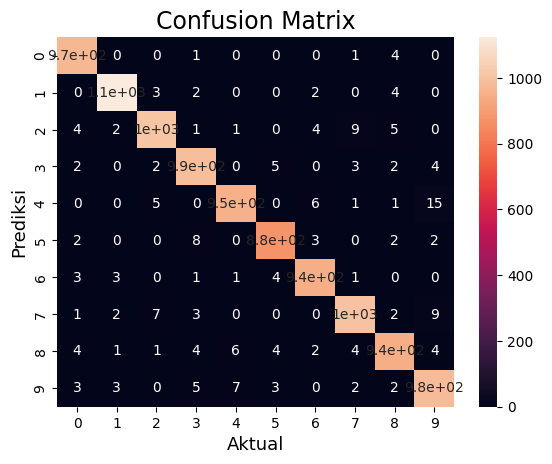

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.ylabel('Prediksi', fontsize=13)
plt.xlabel('Aktual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

## Penjelasan

Dalam kode di atas, kita memuat dataset MNIST dan melakukan normalisasi data. Selanjutnya, kita mendefinisikan arsitektur model ANN dengan 2 layer tersembunyi dan 1 layer output. Fungsi aktivasi ReLU digunakan pada setiap layer tersembunyi dan softmax pada layer output. Model dilatih selama 10 epoch menggunakan optimizer Adam dan loss function categorical cross-entropy. Setelah pelatihan selesai, kita melakukan prediksi pada beberapa data baru. Terakhir,  kita mencetak akurasinya dan confusion matrix antara data aktual dan prediksi.